In [1]:
from plot_functions import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
st = pd.HDFStore("transfer_season_fixed.h5", mode='r')

In [18]:
df = st['/normal_mean']

In [19]:
from altair import *

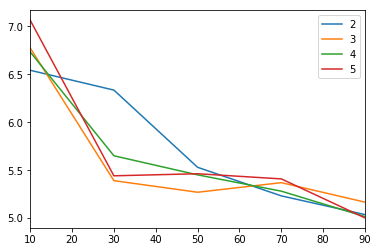

In [24]:
df.plot()

In [27]:
normal_mean.T

,10,30,50,70,90
2,6.542844,6.335932,5.530422,5.232325,5.037144
3,6.775149,5.391059,5.270161,5.370137,5.166786
4,6.733883,5.650661,5.451721,5.281518,5.015600
5,7.064823,5.441687,5.463278,5.409448,5.002336


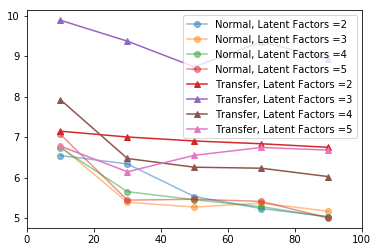

In [32]:
normal_mean = st['/normal_mean']
transfer_mean = st['/transfer_mean']

normal_mean.columns = ['Normal, Latent Factors ='+str(x) for x in normal_mean.columns]
transfer_mean.columns = ['Transfer, Latent Factors ='+str(x) for x in transfer_mean.columns]

ax = normal_mean.plot(color=tableau20blind[::2], marker='o', xlim=(0, 100), alpha=0.5)
transfer_mean.plot(color=tableau20blind[6:][::2], marker='^', xlim=(0, 100), ax=ax)

plt.legend(numpoints=1)

In [ ]:
dd

In [6]:
normal_mean = st['/normal_mean']
transfer_mean = st['/transfer_mean']
normal_mean.columns = ['Normal, Latent Factors ='+str(x) for x in normal_mean.columns]
transfer_mean.columns = ['Transfer, Latent Factors ='+str(x) for x in transfer_mean.columns]
overall_df = pd.concat([normal_mean, transfer_mean], axis=1)
overall_df

,"Normal, Latent Factors =2","Normal, Latent Factors =3","Normal, Latent Factors =4","Normal, Latent Factors =5","Transfer, Latent Factors =2","Transfer, Latent Factors =3","Transfer, Latent Factors =4","Transfer, Latent Factors =5"
10,6.542844,6.775149,6.733883,7.064823,7.144376,9.884189,7.921259,6.775311
30,6.335932,5.391059,5.650661,5.441687,7.000433,9.367215,6.470046,6.142203
50,5.530422,5.270161,5.451721,5.463278,6.902828,8.731820,6.254638,6.548589
70,5.232325,5.370137,5.281518,5.409448,6.833398,9.352807,6.229872,6.742085
90,5.037144,5.166786,5.015600,5.002336,6.746279,8.932881,6.022833,6.676985


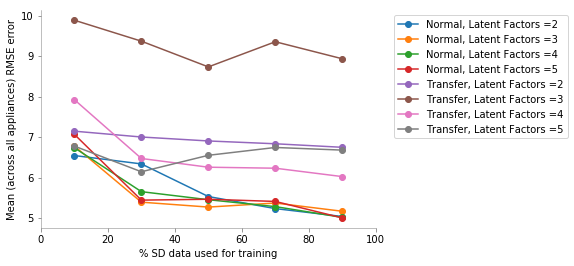

In [7]:
ax = overall_df.plot(kind='line', rot=0, marker='o', color=tableau20blind[::2], xlim=(0, 100))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", numpoints=1)
format_axes(ax)
plt.ylabel("Mean (across all appliances) RMSE error")
plt.xlabel("% SD data used for training")

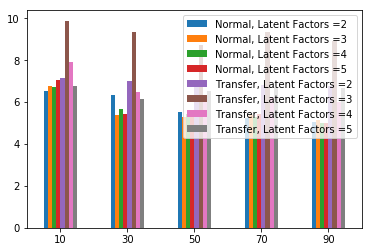

In [34]:
overall_df.plot(kind='bar',rot=0)

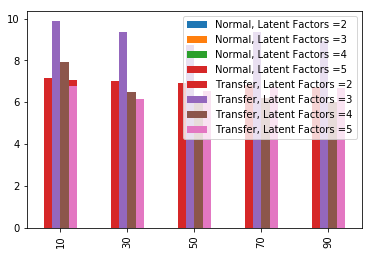

In [8]:


ax = normal_mean.plot(color=tableau20blind[::2], kind='bar', xlim=(0, 100))
transfer_mean.plot(color=tableau20blind[6:][::2], kind='bar', xlim=(0, 100), ax=ax)

plt.legend(numpoints=1)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


KeyError: 'dw'

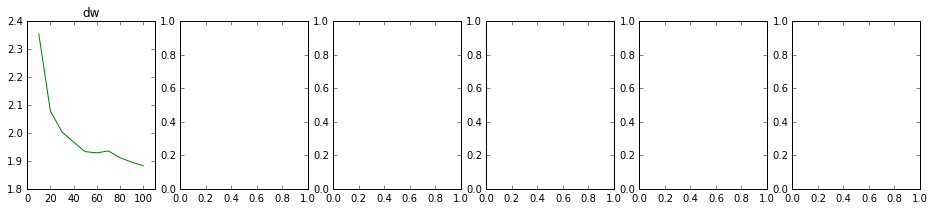

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))
for i, a in enumerate(ax):
    appliance = normal_mean.columns[i]
    ax[i].set_title(appliance)
    normal_mean[appliance].plot(  xlim=(0, 110), colors='g',legend=False, ax=ax[i])
    transfer_mean[appliance].plot(  xlim=(0, 110), colors='r', ax=ax[i], legend=False)
    format_axes(a)
ax[0].set_ylabel("RMSE Fraction")
fig.text(0.5, -0.1, '% Training homes SD')
ax[-1].legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., labels=['Normal', 'Transfer'])


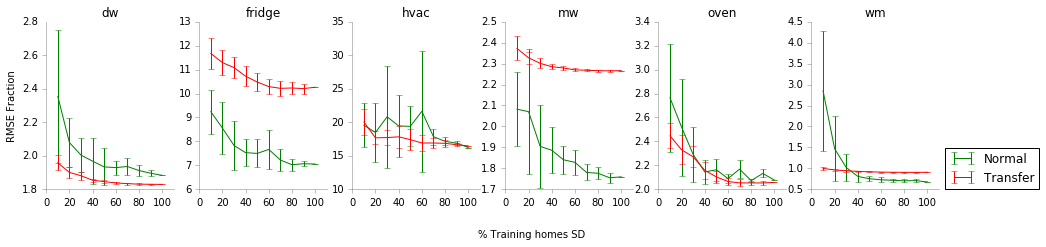

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))
for i, a in enumerate(ax):
    appliance = normal_mean.columns[i]
    ax[i].set_title(appliance)
    normal_mean[appliance].plot( yerr=normal_std[appliance], xlim=(0, 110), colors='g',legend=False, ax=ax[i])
    transfer_mean[appliance].plot( yerr=transfer_std[appliance], xlim=(0, 110), colors='r', ax=ax[i], legend=False)
    format_axes(a)
ax[0].set_ylabel("RMSE Fraction")
fig.text(0.5, -0.1, '% Training homes SD')
ax[-1].legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., labels=['Normal', 'Transfer'])


In [24]:
import pickle

In [29]:
transfer_pred_overall = pickle.load(open("predictions/transfer_pred.pkl",'r'))
normal_pred_overall = pickle.load(open("predictions/normal_pred.pkl",'r'))


In [26]:
from create_matrix import *

df, dfc = create_matrix_single_region("SanDiego", 2014)


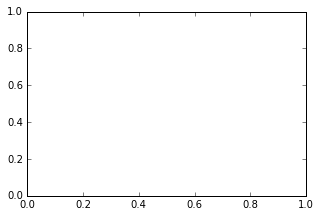

In [95]:
appliance="hvac"

gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]]
gt_appliance.columns = range(12)


from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(5, 3.3))


def update(f):
    random_seed=2
    ax.cla()
    gt_appliance.mean().plot(label='GT', ax=ax)


    prediction_transfer = pd.concat(transfer_pred_overall[random_seed][appliance][f]).ix[df.index]
    prediction_normal = pd.concat(normal_pred_overall[random_seed][appliance][f]).ix[df.index]
    prediction_normal.mean().plot(label='Normal', ax=ax)

    prediction_transfer.mean().plot(label='Transfer', ax=ax)
   
    ax.legend(loc=8, mode="expand", ncol=3)
    
    ax.set_xlabel("Month")
    ax.set_ylabel("Energy")
    #ax.set_ylim((0, 75))
    ax.set_title("{}% SD train data".format(f))
    format_axes(ax)
    




In [96]:
anim = FuncAnimation(fig, update, frames=range(10, 110, 10), interval=500)
anim.save('predictions/%s.gif' %appliance, dpi=100, writer='imagemagick')

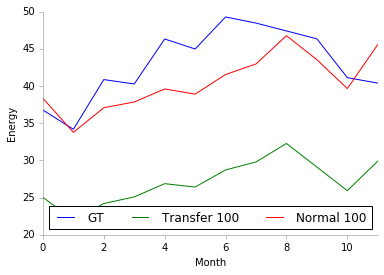

In [61]:


f = 100
random_seed=2

gt_appliance.mean().plot(label='GT')

  
prediction_transfer = pd.concat(transfer_pred_overall[random_seed][appliance][f]).ix[df.index]
prediction_normal = pd.concat(normal_pred_overall[random_seed][appliance][f]).ix[df.index]

prediction_transfer.mean().plot(label='Transfer '+str(f))
prediction_normal.mean().plot(label='Normal '+str(f))
plt.xlabel("Month")
plt.ylabel("Energy")
plt.legend(loc=8, mode="expand", ncol=3)
format_axes(plt.gca())
